# Notebook comparing finetuning results


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

In [9]:
ls ../results/finetuning_0_20/

baseline/ plots/


In [22]:
base_dir = '../results'
paths = {
# standard resutls (internal, external)
'pairwise':'evaluation_test/plots/',
# model pooling / ensembling:
'pooled': 'evaluation_test/prediction_pooled_subsampled/max/plots/',
# finetuned models on 10%:
'ft10': 'finetuning/plots/',
# baseline (of finetuning) on 10%:
'int10': 'finetuning/baseline/plots/',
# finetuned models on 2%:
'ft2': 'finetuning_0_20/plots/',
# baseline (of finetuning) on 2%:
'int2': 'finetuning_0_20/baseline/plots/',
# baseline (of finetuning) on 20%:
'int20': 'finetuning_2_00/baseline/plots/',
# baseline (of finetuning) on 30%:
'int30': 'finetuning_3_00/baseline/plots/',
# baseline (of finetuning) on 40%:
'int40': 'finetuning_4_00/baseline/plots/',
# baseline (of finetuning) on 50%:
'int50': 'finetuning_5_00/baseline/plots/',
}
paths = {key: os.path.join(base_dir, val) for key, val in paths.items()}

In [23]:
paths

{'pairwise': '../results/evaluation_test/plots/',
 'pooled': '../results/evaluation_test/prediction_pooled_subsampled/max/plots/',
 'ft10': '../results/finetuning/plots/',
 'int10': '../results/finetuning/baseline/plots/',
 'ft2': '../results/finetuning_0_20/plots/',
 'int2': '../results/finetuning_0_20/baseline/plots/',
 'int20': '../results/finetuning_2_00/baseline/plots/',
 'int30': '../results/finetuning_3_00/baseline/plots/',
 'int40': '../results/finetuning_4_00/baseline/plots/',
 'int50': '../results/finetuning_5_00/baseline/plots/'}

In [24]:
roc_paths = {key: os.path.join(path, 'roc_summary_subsampled.csv') for key, path in paths.items()}

In [25]:
scatter_paths = {key: os.path.join(path, 'scatter_agg_data.csv') for key, path in paths.items()}

In [26]:
dfs = {key: pd.read_csv(val) for key,val in roc_paths.items()} 

In [27]:
dfs = {key: df.drop(columns='Unnamed: 0') for key, df in dfs.items()}

In [28]:
[df.columns for k, df in dfs.items()]

[Index(['model', 'train_dataset', 'eval_dataset', 'auc_mean', 'auc_std'], dtype='object'),
 Index(['model', 'train_dataset', 'eval_dataset', 'auc_mean', 'auc_std'], dtype='object'),
 Index(['model', 'train_dataset', 'eval_dataset', 'auc_mean', 'auc_std'], dtype='object'),
 Index(['model', 'train_dataset', 'eval_dataset', 'auc_mean', 'auc_std'], dtype='object'),
 Index(['model', 'train_dataset', 'eval_dataset', 'auc_mean', 'auc_std'], dtype='object'),
 Index(['model', 'train_dataset', 'eval_dataset', 'auc_mean', 'auc_std'], dtype='object'),
 Index(['model', 'train_dataset', 'eval_dataset', 'auc_mean', 'auc_std'], dtype='object'),
 Index(['model', 'train_dataset', 'eval_dataset', 'auc_mean', 'auc_std'], dtype='object'),
 Index(['model', 'train_dataset', 'eval_dataset', 'auc_mean', 'auc_std'], dtype='object'),
 Index(['model', 'train_dataset', 'eval_dataset', 'auc_mean', 'auc_std'], dtype='object')]

In [29]:
dfs.keys()

dict_keys(['pairwise', 'pooled', 'ft10', 'int10', 'ft2', 'int2', 'int20', 'int30', 'int40', 'int50'])

In [42]:
ft_size_mapping = {
    'ft2': 0.02,
    'ft10': 0.1,
    'int2': 0.02,
    'int10': 0.1,
    'int20': 0.2,
    'int30': 0.3,
    'int40': 0.4,
    'int50': 0.5,

}
print('KEY, FINETUNED, BASELINE, FT-SIZE, POOLED')
for key, df in dfs.items():
    is_finetuned = True if 'ft' in key else False
    df['finetuned'] = is_finetuned
    is_baseline = True if 'int' in key else False
    df['baseline'] = is_baseline
    is_pooled = True if 'pooled' in key else False
    df['pooled'] = is_pooled
    if key in ft_size_mapping.keys():
        ft_size = ft_size_mapping[key]
    else:
        ft_size = np.nan
    df['finetuning_size'] = ft_size
   
    print(key, is_finetuned, is_baseline, ft_size, is_pooled)
    dfs[key] = df

KEY, FINETUNED, BASELINE, FT-SIZE, POOLED
pairwise False False nan False
pooled False False nan True
ft10 True False 0.1 False
int10 False True 0.1 False
ft2 True False 0.02 False
int2 False True 0.02 False
int20 False True 0.2 False
int30 False True 0.3 False
int40 False True 0.4 False
int50 False True 0.5 False


In [44]:
dfs['pairwise']

,model,train_dataset,eval_dataset,auc_mean,auc_std,finetuned,baseline,finetuning_size,pooled
0,AttentionModel,aumc,aumc,0.916687,0.003649,False,False,NaN,False
1,GRUModel,aumc,aumc,0.856065,0.014158,False,False,NaN,False
2,lgbm,aumc,aumc,0.893969,0.004147,False,False,NaN,False
3,lr,aumc,aumc,0.882309,0.001821,False,False,NaN,False
4,mews,aumc,aumc,0.718191,0.000000,False,False,NaN,False
...,...,...,...,...,...,...,...,...,...
139,mews,mimic,mimic,0.609735,0.000000,False,False,NaN,False
140,news,mimic,mimic,0.653109,0.000000,False,False,NaN,False
141,qsofa,mimic,mimic,0.566735,0.000000,False,False,NaN,False
142,sirs,mimic,mimic,0.608508,0.000000,False,False,NaN,False


## load scatter results

In [46]:
sdfs = {key: pd.read_csv(val) for key,val in scatter_paths.items()} #scatter dfs

In [47]:
sdfs

{'pairwise':       model  x_mean     x_std    y_mean     y_std train_dataset eval_dataset
 0    attn     4.200  0.266927  0.556745  0.022750          aumc         aumc
 1    gru      4.195  0.778299  0.410201  0.043130          aumc         aumc
 2    lgbm     6.530  0.816701  0.502154  0.018110          aumc         aumc
 3    lr       6.125  0.390512  0.477825  0.007715          aumc         aumc
 4    mews     5.000  0.000000  0.293807  0.000000          aumc         aumc
 ..      ...     ...       ...       ...       ...           ...          ...
 139  mews     5.200  0.000000  0.226825  0.000000         mimic        mimic
 140  news     4.025  0.000000  0.246847  0.000000         mimic        mimic
 141  qsofa    4.250  0.000000  0.211539  0.000000         mimic        mimic
 142  sirs     6.725  0.000000  0.223432  0.000000         mimic        mimic
 143  sofa     0.000  0.000000  0.271080  0.000000         mimic        mimic
 
 [144 rows x 7 columns],
 'pooled':      model  x_

In [48]:
# restrict to attn model:
keys = ['pairwise', 'pooled']
for key in keys:
    dfs[key] = dfs[key].query("model == 'AttentionModel'")
    sdfs[key] = sdfs[key].query("model.str.contains('attn')") #different versions of attn
    

In [50]:
df = pd.concat(dfs)

In [51]:
df

model train_dataset eval_dataset  auc_mean   auc_std  \
pairwise 0   AttentionModel          aumc         aumc  0.916687  0.003649   
         9   AttentionModel          aumc         eicu  0.698914  0.010913   
         18  AttentionModel          aumc        hirid  0.732736  0.013468   
         27  AttentionModel          aumc        mimic  0.683240  0.013410   
         36  AttentionModel          eicu         aumc  0.732401  0.006840   
...                     ...           ...          ...       ...       ...   
int40    3   AttentionModel         mimic        mimic  0.813339  0.001457   
int50    0   AttentionModel          aumc         aumc  0.909833  0.004767   
         1   AttentionModel          eicu         eicu  0.793521  0.003445   
         2   AttentionModel         hirid        hirid  0.827356  0.001454   
         3   AttentionModel         mimic        mimic  0.815000  0.001442   

             finetuned  baseline  finetuning_size  pooled  
pairwise 0       False     False              NaN   False  
         9       False     False              NaN   False  
         18      False     False              NaN   False  
         27      False     False              NaN   False  
         36      False     False              NaN   False  
...                ...       ...              ...     ...  
int40    3       False      True              0.4   False  
int50    0       False      True              0.5   False  
         1       False      True              0.5   False  
         2       False      True              0.5   False  
         3       False      True              0.5   False  

[68 rows x 9 columns]

In [52]:
full_dfs = {}
for k in dfs.keys():
    full_dfs[k] = pd.merge(dfs[k], sdfs[k], on=['train_dataset', 'eval_dataset'])

In [53]:
for k in full_dfs.keys():
    full_dfs[k] = full_dfs[k].rename(columns=
        {'x_mean': 'earliness_mean', 
         'x_std': 'earliness_std', 
         'y_mean': 'precision_mean', 
         'y_std': 'precision_std' }
    )

In [55]:
full_dfs

{'pairwise':            model_x train_dataset eval_dataset  auc_mean   auc_std  finetuned  \
 0   AttentionModel          aumc         aumc  0.916687  0.003649      False   
 1   AttentionModel          aumc         eicu  0.698914  0.010913      False   
 2   AttentionModel          aumc        hirid  0.732736  0.013468      False   
 3   AttentionModel          aumc        mimic  0.683240  0.013410      False   
 4   AttentionModel          eicu         aumc  0.732401  0.006840      False   
 5   AttentionModel          eicu         eicu  0.802011  0.003560      False   
 6   AttentionModel          eicu        hirid  0.704782  0.026302      False   
 7   AttentionModel          eicu        mimic  0.713040  0.009499      False   
 8   AttentionModel         hirid         aumc  0.805040  0.014322      False   
 9   AttentionModel         hirid         eicu  0.705298  0.009176      False   
 10  AttentionModel         hirid        hirid  0.833421  0.002325      False   
 11  AttentionMo

In [56]:
df = pd.concat(full_dfs)

In [57]:
df['model_x'].unique()

array(['AttentionModel'], dtype=object)

In [58]:
df

model_x train_dataset eval_dataset  auc_mean   auc_std  \
pairwise 0  AttentionModel          aumc         aumc  0.916687  0.003649   
         1  AttentionModel          aumc         eicu  0.698914  0.010913   
         2  AttentionModel          aumc        hirid  0.732736  0.013468   
         3  AttentionModel          aumc        mimic  0.683240  0.013410   
         4  AttentionModel          eicu         aumc  0.732401  0.006840   
...                    ...           ...          ...       ...       ...   
int40    3  AttentionModel         mimic        mimic  0.813339  0.001457   
int50    0  AttentionModel          aumc         aumc  0.909833  0.004767   
         1  AttentionModel          eicu         eicu  0.793521  0.003445   
         2  AttentionModel         hirid        hirid  0.827356  0.001454   
         3  AttentionModel         mimic        mimic  0.815000  0.001442   

            finetuned  baseline  finetuning_size  pooled model_y  \
pairwise 0      False     False              NaN   False  attn     
         1      False     False              NaN   False  attn     
         2      False     False              NaN   False  attn     
         3      False     False              NaN   False  attn     
         4      False     False              NaN   False  attn     
...               ...       ...              ...     ...     ...   
int40    3      False      True              0.4   False  attn     
int50    0      False      True              0.5   False  attn     
         1      False      True              0.5   False  attn     
         2      False      True              0.5   False  attn     
         3      False      True              0.5   False  attn     

            earliness_mean  earliness_std  precision_mean  precision_std  
pairwise 0           4.200       0.266927        0.556745       0.022750  
         1           3.665       1.215730        0.270020       0.008207  
         2           3.120       1.037184        0.296823       0.012759  
         3           4.065       1.208770        0.250691       0.008047  
         4           3.620       1.381055        0.275125       0.008972  
...                    ...            ...             ...            ...  
int40    3           3.995       0.306390        0.358798       0.005626  
int50    0           3.565       0.407584        0.545334       0.023250  
         1           3.520       0.683374        0.348174       0.009799  
         2           2.810       0.405663        0.377411       0.006312  
         3           4.240       0.041833        0.361766       0.004234  

[68 rows x 14 columns]

In [59]:
# we look at the attn model:
df = df.query("model_x == 'AttentionModel'")
# drop obsolete dataset (too heterogenous / low quality)
df = df.query("train_dataset != 'emory' & eval_dataset != 'emory'")

In [60]:
df

model_x train_dataset eval_dataset  auc_mean   auc_std  \
pairwise 0  AttentionModel          aumc         aumc  0.916687  0.003649   
         1  AttentionModel          aumc         eicu  0.698914  0.010913   
         2  AttentionModel          aumc        hirid  0.732736  0.013468   
         3  AttentionModel          aumc        mimic  0.683240  0.013410   
         4  AttentionModel          eicu         aumc  0.732401  0.006840   
...                    ...           ...          ...       ...       ...   
int40    3  AttentionModel         mimic        mimic  0.813339  0.001457   
int50    0  AttentionModel          aumc         aumc  0.909833  0.004767   
         1  AttentionModel          eicu         eicu  0.793521  0.003445   
         2  AttentionModel         hirid        hirid  0.827356  0.001454   
         3  AttentionModel         mimic        mimic  0.815000  0.001442   

            finetuned  baseline  finetuning_size  pooled model_y  \
pairwise 0      False     False              NaN   False  attn     
         1      False     False              NaN   False  attn     
         2      False     False              NaN   False  attn     
         3      False     False              NaN   False  attn     
         4      False     False              NaN   False  attn     
...               ...       ...              ...     ...     ...   
int40    3      False      True              0.4   False  attn     
int50    0      False      True              0.5   False  attn     
         1      False      True              0.5   False  attn     
         2      False      True              0.5   False  attn     
         3      False      True              0.5   False  attn     

            earliness_mean  earliness_std  precision_mean  precision_std  
pairwise 0           4.200       0.266927        0.556745       0.022750  
         1           3.665       1.215730        0.270020       0.008207  
         2           3.120       1.037184        0.296823       0.012759  
         3           4.065       1.208770        0.250691       0.008047  
         4           3.620       1.381055        0.275125       0.008972  
...                    ...            ...             ...            ...  
int40    3           3.995       0.306390        0.358798       0.005626  
int50    0           3.565       0.407584        0.545334       0.023250  
         1           3.520       0.683374        0.348174       0.009799  
         2           2.810       0.405663        0.377411       0.006312  
         3           4.240       0.041833        0.361766       0.004234  

[68 rows x 14 columns]

In [61]:
df_int = df.query("train_dataset == eval_dataset & \
        finetuned == False & \
        train_dataset != 'pooled' & \
        baseline == False"
)
assert len(df_int) == 4

In [62]:
df_int

model_x train_dataset eval_dataset  auc_mean   auc_std  \
pairwise 0   AttentionModel          aumc         aumc  0.916687  0.003649   
         5   AttentionModel          eicu         eicu  0.802011  0.003560   
         10  AttentionModel         hirid        hirid  0.833421  0.002325   
         15  AttentionModel         mimic        mimic  0.830490  0.003029   

             finetuned  baseline  finetuning_size  pooled model_y  \
pairwise 0       False     False              NaN   False  attn     
         5       False     False              NaN   False  attn     
         10      False     False              NaN   False  attn     
         15      False     False              NaN   False  attn     

             earliness_mean  earliness_std  precision_mean  precision_std  
pairwise 0            4.200       0.266927        0.556745       0.022750  
         5            4.615       0.986724        0.347525       0.010727  
         10           2.730       0.220369        0.392262       0.007573  
         15           3.325       0.340955        0.381639       0.007537

In [63]:
earliness_means = {}
earliness_stds = {}
precision_means = {}
precision_stds = {}

In [64]:
earliness_means['int'] = df_int.mean()['earliness_mean']
earliness_stds['int'] = df_int.std()['earliness_mean']



/var/folders/vp/67rz7yg93fn4hrmg1q9wpbbm0000gn/T/ipykernel_33595/1228713345.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  earliness_means['int'] = df_int.mean()['earliness_mean']
/var/folders/vp/67rz7yg93fn4hrmg1q9wpbbm0000gn/T/ipykernel_33595/1228713345.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  earliness_stds['int'] = df_int.std()['earliness_mean']


In [67]:
df_pw = df.query("train_dataset != eval_dataset & finetuned == False & train_dataset != 'pooled' & baseline == False")
assert len(df_pw) == 12

In [71]:
df_pw

model_x train_dataset eval_dataset  auc_mean   auc_std  \
pairwise 1   AttentionModel          aumc         eicu  0.698914  0.010913   
         2   AttentionModel          aumc        hirid  0.732736  0.013468   
         3   AttentionModel          aumc        mimic  0.683240  0.013410   
         4   AttentionModel          eicu         aumc  0.732401  0.006840   
         6   AttentionModel          eicu        hirid  0.704782  0.026302   
         7   AttentionModel          eicu        mimic  0.713040  0.009499   
         8   AttentionModel         hirid         aumc  0.805040  0.014322   
         9   AttentionModel         hirid         eicu  0.705298  0.009176   
         11  AttentionModel         hirid        mimic  0.646188  0.013088   
         12  AttentionModel         mimic         aumc  0.799113  0.023053   
         13  AttentionModel         mimic         eicu  0.752309  0.007755   
         14  AttentionModel         mimic        hirid  0.693788  0.010552   

             finetuned  baseline  finetuning_size  pooled model_y  \
pairwise 1       False     False              NaN   False  attn     
         2       False     False              NaN   False  attn     
         3       False     False              NaN   False  attn     
         4       False     False              NaN   False  attn     
         6       False     False              NaN   False  attn     
         7       False     False              NaN   False  attn     
         8       False     False              NaN   False  attn     
         9       False     False              NaN   False  attn     
         11      False     False              NaN   False  attn     
         12      False     False              NaN   False  attn     
         13      False     False              NaN   False  attn     
         14      False     False              NaN   False  attn     

             earliness_mean  earliness_std  precision_mean  precision_std  
pairwise 1            3.665       1.215730        0.270020       0.008207  
         2            3.120       1.037184        0.296823       0.012759  
         3            4.065       1.208770        0.250691       0.008047  
         4            3.620       1.381055        0.275125       0.008972  
         6            2.595       1.117111        0.275680       0.019701  
         7            4.055       0.391871        0.265549       0.006703  
         8            1.430       0.642845        0.350750       0.035958  
         9            2.935       0.848454        0.265624       0.008938  
         11           3.060       1.015905        0.225473       0.008254  
         12           3.050       2.042134        0.341887       0.050935  
         13           3.565       0.950592        0.308091       0.010487  
         14           0.845       0.834865        0.261874       0.012088

In [72]:
earliness_means['pw'] = df_pw.mean()['earliness_mean']
earliness_stds['pw'] = df_pw.std()['earliness_mean']

/var/folders/vp/67rz7yg93fn4hrmg1q9wpbbm0000gn/T/ipykernel_33595/1354249333.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  earliness_means['pw'] = df_pw.mean()['earliness_mean']
/var/folders/vp/67rz7yg93fn4hrmg1q9wpbbm0000gn/T/ipykernel_33595/1354249333.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  earliness_stds['pw'] = df_pw.std()['earliness_mean']


In [73]:
earliness_means

{'int': 3.7175000000000002, 'pw': 3.0004166666666663}

In [74]:
df_po = df.query("train_dataset == 'pooled' & finetuned == False & baseline == False")
assert len(df_po) == 4

In [75]:
df_po

model_x train_dataset eval_dataset  auc_mean   auc_std  \
pooled 0  AttentionModel        pooled         aumc  0.836354  0.010690   
       1  AttentionModel        pooled         eicu  0.759689  0.006701   
       2  AttentionModel        pooled        hirid  0.728090  0.013592   
       3  AttentionModel        pooled        mimic  0.719022  0.005418   

          finetuned  baseline  finetuning_size  pooled model_y  \
pooled 0      False     False              NaN    True  attn     
       1      False     False              NaN    True  attn     
       2      False     False              NaN    True  attn     
       3      False     False              NaN    True  attn     

          earliness_mean  earliness_std  precision_mean  precision_std  
pooled 0           0.980       0.967180        0.397105       0.027916  
       1           1.390       1.001499        0.310632       0.010381  
       2           1.165       1.106882        0.289927       0.011515  
       3           3.290       0.455041        0.274747       0.006186

In [76]:
earliness_means['po'] = df_po.mean()['earliness_mean']
earliness_stds['po'] = df_po.std()['earliness_mean']

/var/folders/vp/67rz7yg93fn4hrmg1q9wpbbm0000gn/T/ipykernel_33595/4184905722.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  earliness_means['po'] = df_po.mean()['earliness_mean']
/var/folders/vp/67rz7yg93fn4hrmg1q9wpbbm0000gn/T/ipykernel_33595/4184905722.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  earliness_stds['po'] = df_po.std()['earliness_mean']


## finetuning on 10%

In [78]:
def get_ft(ft_size=0.10):
    return df.query("train_dataset != 'pooled' & finetuned == True & baseline == False & finetuning_size == @ft_size")

In [79]:
df_ft10 = get_ft(0.10)
#auc_ft10_mean = df_ft10['auc_mean'].mean()
#auc_ft10_std = df_ft10['auc_mean'].std()
assert len(df_ft10) == 12

In [80]:
df_ft10

model_x train_dataset eval_dataset  auc_mean   auc_std  \
ft10 0   AttentionModel          aumc         eicu  0.756380  0.007044   
     1   AttentionModel          aumc        hirid  0.791977  0.002111   
     2   AttentionModel          aumc        mimic  0.784582  0.001923   
     3   AttentionModel          eicu         aumc  0.873557  0.016987   
     4   AttentionModel          eicu        hirid  0.773977  0.001597   
     5   AttentionModel          eicu        mimic  0.788518  0.002695   
     6   AttentionModel         hirid         aumc  0.866544  0.010388   
     7   AttentionModel         hirid         eicu  0.761616  0.004486   
     8   AttentionModel         hirid        mimic  0.793447  0.002462   
     9   AttentionModel         mimic         aumc  0.893961  0.003589   
     10  AttentionModel         mimic         eicu  0.792816  0.003978   
     11  AttentionModel         mimic        hirid  0.796193  0.003922   

         finetuned  baseline  finetuning_size  pooled model_y  earliness_mean  \
ft10 0        True     False              0.1   False  attn             3.530   
     1        True     False              0.1   False  attn             4.300   
     2        True     False              0.1   False  attn             4.090   
     3        True     False              0.1   False  attn             2.835   
     4        True     False              0.1   False  attn             2.740   
     5        True     False              0.1   False  attn             3.490   
     6        True     False              0.1   False  attn             3.130   
     7        True     False              0.1   False  attn             2.690   
     8        True     False              0.1   False  attn             2.500   
     9        True     False              0.1   False  attn             1.630   
     10       True     False              0.1   False  attn             3.955   
     11       True     False              0.1   False  attn             2.415   

         earliness_std  precision_mean  precision_std  
ft10 0        1.080856        0.308463       0.009794  
     1        0.244949        0.341515       0.003953  
     2        0.318983        0.318878       0.004958  
     3        0.815015        0.476981       0.039907  
     4        0.668160        0.319227       0.002441  
     5        0.171026        0.330190       0.007292  
     6        1.262735        0.435645       0.033262  
     7        0.535490        0.312162       0.004907  
     8        0.736758        0.331902       0.008562  
     9        0.531037        0.517210       0.018889  
     10       0.582130        0.347622       0.004144  
     11       0.413673        0.329867       0.006922

In [81]:
earliness_means['ft10'] = df_ft10.mean()['earliness_mean']
earliness_stds['ft10'] = df_ft10.std()['earliness_mean']

/var/folders/vp/67rz7yg93fn4hrmg1q9wpbbm0000gn/T/ipykernel_33595/894474592.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  earliness_means['ft10'] = df_ft10.mean()['earliness_mean']
/var/folders/vp/67rz7yg93fn4hrmg1q9wpbbm0000gn/T/ipykernel_33595/894474592.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  earliness_stds['ft10'] = df_ft10.std()['earliness_mean']


In [48]:
earliness_means

{'int': 3.70375,
 'pw': 3.0066666666666664,
 'po': 1.7537500000000001,
 'ft10': 3.116666666666667}

In [83]:
def get_baseline(ft_size=0.10):
    return df.query("train_dataset != 'pooled' & finetuned == False & baseline == True & finetuning_size == @ft_size")

In [84]:
df_base10 = get_baseline(0.10)
#auc_base10_mean = df_base10['auc_mean'].mean()
#auc_base10_std = df_base10['auc_mean'].std()

In [85]:
earliness_means['int10'] = df_base10.mean()['earliness_mean']
earliness_stds['int10'] = df_base10.std()['earliness_mean']

/var/folders/vp/67rz7yg93fn4hrmg1q9wpbbm0000gn/T/ipykernel_33595/1832192828.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  earliness_means['int10'] = df_base10.mean()['earliness_mean']
/var/folders/vp/67rz7yg93fn4hrmg1q9wpbbm0000gn/T/ipykernel_33595/1832192828.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  earliness_stds['int10'] = df_base10.std()['earliness_mean']


In [86]:
earliness_stds 

{'int': 0.8500049019466496,
 'pw': 0.9858440277090981,
 'po': 1.0690601401854496,
 'ft10': 0.7889092729262923,
 'int10': 1.9405943032998934}

## finetuning on 2%

In [87]:
df_ft2 = get_ft(0.02)
#auc_ft2_mean = df_ft2['auc_mean'].mean()
#auc_ft2_std = df_ft2['auc_mean'].std()

In [88]:
earliness_means['ft2'] = df_ft2.mean()['earliness_mean']
earliness_stds['ft2'] = df_ft2.std()['earliness_mean']

/var/folders/vp/67rz7yg93fn4hrmg1q9wpbbm0000gn/T/ipykernel_33595/2657514013.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  earliness_means['ft2'] = df_ft2.mean()['earliness_mean']
/var/folders/vp/67rz7yg93fn4hrmg1q9wpbbm0000gn/T/ipykernel_33595/2657514013.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  earliness_stds['ft2'] = df_ft2.std()['earliness_mean']


In [89]:
earliness_means

{'int': 3.7175000000000002,
 'pw': 3.0004166666666663,
 'po': 1.70625,
 'ft10': 3.10875,
 'int10': 6.0562499999999995,
 'ft2': 3.507916666666667}

In [60]:
#auc_ft2_mean

0.7632434823574795

In [90]:
df_base2 = get_baseline(0.02)
#auc_base2_mean = df_base2['auc_mean'].mean()
#auc_base2_std = df_base2['auc_mean'].std()

In [91]:
earliness_means['int2'] = df_base2.mean()['earliness_mean']
earliness_stds['int2'] = df_base2.std()['earliness_mean']

/var/folders/vp/67rz7yg93fn4hrmg1q9wpbbm0000gn/T/ipykernel_33595/1515663671.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  earliness_means['int2'] = df_base2.mean()['earliness_mean']
/var/folders/vp/67rz7yg93fn4hrmg1q9wpbbm0000gn/T/ipykernel_33595/1515663671.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  earliness_stds['int2'] = df_base2.std()['earliness_mean']


## Baseline on 20% (internal)

In [92]:
df_base20 = get_baseline(0.2)


In [94]:
earliness_means['int20'] = df_base20.mean()['earliness_mean']
earliness_stds['int20'] = df_base20.std()['earliness_mean']

/var/folders/vp/67rz7yg93fn4hrmg1q9wpbbm0000gn/T/ipykernel_33595/1005798550.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  earliness_means['int20'] = df_base20.mean()['earliness_mean']
/var/folders/vp/67rz7yg93fn4hrmg1q9wpbbm0000gn/T/ipykernel_33595/1005798550.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  earliness_stds['int20'] = df_base20.std()['earliness_mean']


## Baseline on 30% (internal)

In [95]:
df_base30 = get_baseline(0.3)
earliness_means['int30'] = df_base30.mean()['earliness_mean']
earliness_stds['int30'] = df_base30.std()['earliness_mean']

/var/folders/vp/67rz7yg93fn4hrmg1q9wpbbm0000gn/T/ipykernel_33595/4292486324.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  earliness_means['int30'] = df_base30.mean()['earliness_mean']
/var/folders/vp/67rz7yg93fn4hrmg1q9wpbbm0000gn/T/ipykernel_33595/4292486324.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  earliness_stds['int30'] = df_base30.std()['earliness_mean']


## Baseline on 40% (internal)

In [96]:
df_base40 = get_baseline(0.4)
earliness_means['int40'] = df_base40.mean()['earliness_mean']
earliness_stds['int40'] = df_base40.std()['earliness_mean']

/var/folders/vp/67rz7yg93fn4hrmg1q9wpbbm0000gn/T/ipykernel_33595/29571973.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  earliness_means['int40'] = df_base40.mean()['earliness_mean']
/var/folders/vp/67rz7yg93fn4hrmg1q9wpbbm0000gn/T/ipykernel_33595/29571973.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  earliness_stds['int40'] = df_base40.std()['earliness_mean']


## Baseline on 50% (internal)

In [97]:
df_base50 = get_baseline(0.5)
earliness_means['int50'] = df_base50.mean()['earliness_mean']
earliness_stds['int50'] = df_base50.std()['earliness_mean']

/var/folders/vp/67rz7yg93fn4hrmg1q9wpbbm0000gn/T/ipykernel_33595/1162371449.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  earliness_means['int50'] = df_base50.mean()['earliness_mean']
/var/folders/vp/67rz7yg93fn4hrmg1q9wpbbm0000gn/T/ipykernel_33595/1162371449.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  earliness_stds['int50'] = df_base50.std()['earliness_mean']


In [100]:
df = df.reset_index()

In [101]:
df

,level_0,level_1,model_x,train_dataset,eval_dataset,auc_mean,auc_std,finetuned,baseline,finetuning_size,pooled,model_y,earliness_mean,earliness_std,precision_mean,precision_std
0,pairwise,0,AttentionModel,aumc,aumc,0.916687,0.003649,False,False,NaN,False,attn,4.200,0.266927,0.556745,0.022750
1,pairwise,1,AttentionModel,aumc,eicu,0.698914,0.010913,False,False,NaN,False,attn,3.665,1.215730,0.270020,0.008207
2,pairwise,2,AttentionModel,aumc,hirid,0.732736,0.013468,False,False,NaN,False,attn,3.120,1.037184,0.296823,0.012759
3,pairwise,3,AttentionModel,aumc,mimic,0.683240,0.013410,False,False,NaN,False,attn,4.065,1.208770,0.250691,0.008047
4,pairwise,4,AttentionModel,eicu,aumc,0.732401,0.006840,False,False,NaN,False,attn,3.620,1.381055,0.275125,0.008972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,int40,3,AttentionModel,mimic,mimic,0.813339,0.001457,False,True,0.4,False,attn,3.995,0.306390,0.358798,0.005626
64,int50,0,AttentionModel,aumc,aumc,0.909833,0.004767,False,True,0.5,False,attn,3.565,0.407584,0.545334,0.023250
65,int50,1,AttentionModel,eicu,eicu,0.793521,0.003445,False,True,0.5,False,attn,3.520,0.683374,0.348174,0.009799
66,int50,2,AttentionModel,hirid,hirid,0.827356,0.001454,False,True,0.5,False,attn,2.810,0.405663,0.377411,0.006312


In [102]:
df = df.rename(columns={'level_0': 'task'})

In [106]:
df.sort_values(by=['task'])

,task,level_1,model_x,train_dataset,eval_dataset,auc_mean,auc_std,finetuned,baseline,finetuning_size,pooled,model_y,earliness_mean,earliness_std,precision_mean,precision_std
22,ft10,2,AttentionModel,aumc,mimic,0.784582,0.001923,True,False,0.1,False,attn,4.090,0.318983,0.318878,0.004958
23,ft10,3,AttentionModel,eicu,aumc,0.873557,0.016987,True,False,0.1,False,attn,2.835,0.815015,0.476981,0.039907
24,ft10,4,AttentionModel,eicu,hirid,0.773977,0.001597,True,False,0.1,False,attn,2.740,0.668160,0.319227,0.002441
25,ft10,5,AttentionModel,eicu,mimic,0.788518,0.002695,True,False,0.1,False,attn,3.490,0.171026,0.330190,0.007292
26,ft10,6,AttentionModel,hirid,aumc,0.866544,0.010388,True,False,0.1,False,attn,3.130,1.262735,0.435645,0.033262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,pairwise,10,AttentionModel,hirid,hirid,0.833421,0.002325,False,False,NaN,False,attn,2.730,0.220369,0.392262,0.007573
16,pooled,0,AttentionModel,pooled,aumc,0.836354,0.010690,False,False,NaN,True,attn,0.980,0.967180,0.397105,0.027916
17,pooled,1,AttentionModel,pooled,eicu,0.759689,0.006701,False,False,NaN,True,attn,1.390,1.001499,0.310632,0.010381
18,pooled,2,AttentionModel,pooled,hirid,0.728090,0.013592,False,False,NaN,True,attn,1.165,1.106882,0.289927,0.011515


<AxesSubplot:xlabel='task', ylabel='auc_mean'>

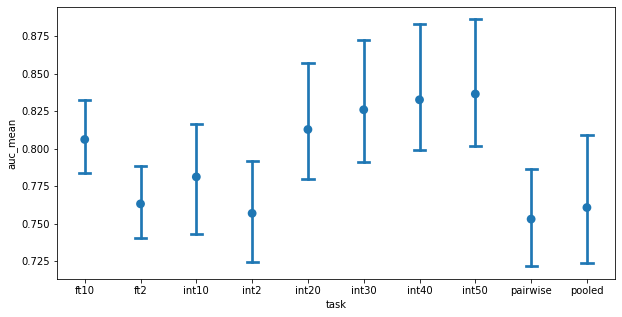

In [107]:
plt.figure(figsize=(10,5))
sns.pointplot(x='task', y='auc_mean', data=df.sort_values(by=['task']), join=False, capsize=0.2)
# wrong labels!

In [76]:
earliness_means

{'int': 3.70375,
 'pw': 3.0066666666666664,
 'po': 1.7537500000000001,
 'ft10': 3.116666666666667,
 'int10': 6.03875,
 'ft2': 3.507916666666667,
 'int2': 6.921249999999999}

In [108]:
def get_measure(df, func, measure):
    return getattr(df, func)()[measure]


In [109]:
get_measure(df_int, 'std', 'earliness_mean')

/var/folders/vp/67rz7yg93fn4hrmg1q9wpbbm0000gn/T/ipykernel_33595/3095324987.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return getattr(df, func)()[measure]


0.8500049019466496

In [111]:
keys = ['pw', 'po', 'ft2', 'int2', 'ft10', 'int10', 'int20', 'int30', 'int40', 'int50', 'int']
df_ = [df_pw, df_po, df_ft2, df_base2, df_ft10, df_base10, df_base20, df_base30, df_base40, df_base50, df_int]

In [112]:
df__ = pd.concat(df_) # for export

In [113]:
df__

model_x train_dataset eval_dataset  auc_mean   auc_std  \
pairwise 1   AttentionModel          aumc         eicu  0.698914  0.010913   
         2   AttentionModel          aumc        hirid  0.732736  0.013468   
         3   AttentionModel          aumc        mimic  0.683240  0.013410   
         4   AttentionModel          eicu         aumc  0.732401  0.006840   
         6   AttentionModel          eicu        hirid  0.704782  0.026302   
...                     ...           ...          ...       ...       ...   
int50    3   AttentionModel         mimic        mimic  0.815000  0.001442   
pairwise 0   AttentionModel          aumc         aumc  0.916687  0.003649   
         5   AttentionModel          eicu         eicu  0.802011  0.003560   
         10  AttentionModel         hirid        hirid  0.833421  0.002325   
         15  AttentionModel         mimic        mimic  0.830490  0.003029   

             finetuned  baseline  finetuning_size  pooled model_y  \
pairwise 1       False     False              NaN   False  attn     
         2       False     False              NaN   False  attn     
         3       False     False              NaN   False  attn     
         4       False     False              NaN   False  attn     
         6       False     False              NaN   False  attn     
...                ...       ...              ...     ...     ...   
int50    3       False      True              0.5   False  attn     
pairwise 0       False     False              NaN   False  attn     
         5       False     False              NaN   False  attn     
         10      False     False              NaN   False  attn     
         15      False     False              NaN   False  attn     

             earliness_mean  earliness_std  precision_mean  precision_std  
pairwise 1            3.665       1.215730        0.270020       0.008207  
         2            3.120       1.037184        0.296823       0.012759  
         3            4.065       1.208770        0.250691       0.008047  
         4            3.620       1.381055        0.275125       0.008972  
         6            2.595       1.117111        0.275680       0.019701  
...                     ...            ...             ...            ...  
int50    3            4.240       0.041833        0.361766       0.004234  
pairwise 0            4.200       0.266927        0.556745       0.022750  
         5            4.615       0.986724        0.347525       0.010727  
         10           2.730       0.220369        0.392262       0.007573  
         15           3.325       0.340955        0.381639       0.007537  

[68 rows x 14 columns]

In [114]:
df__.to_csv('performance_finetuning_new.csv')

In [115]:
earliness_means = {}
earliness_stds = {}
for key, _df in zip(keys, df_):
    earliness_means[key] = get_measure(_df, 'mean', 'earliness_mean')
    earliness_stds[key] = get_measure(_df, 'std', 'earliness_mean')

/var/folders/vp/67rz7yg93fn4hrmg1q9wpbbm0000gn/T/ipykernel_33595/3095324987.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return getattr(df, func)()[measure]


In [116]:
earliness_means

{'pw': 3.0004166666666663,
 'po': 1.70625,
 'ft2': 3.507916666666667,
 'int2': 6.921249999999999,
 'ft10': 3.10875,
 'int10': 6.0562499999999995,
 'int20': 4.8325000000000005,
 'int30': 4.455,
 'int40': 4.015000000000001,
 'int50': 3.5337500000000004,
 'int': 3.7175000000000002}

In [118]:
precision_means = {}
precision_stds = {}
for key, _df in zip(keys, df_):
    precision_means[key] = get_measure(_df, 'mean', 'precision_mean')
    precision_stds[key] = get_measure(_df, 'std', 'precision_mean')

/var/folders/vp/67rz7yg93fn4hrmg1q9wpbbm0000gn/T/ipykernel_33595/3095324987.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return getattr(df, func)()[measure]


In [119]:
auc_means = {}
auc_stds = {}
for key, _df in zip(keys, df_):
    auc_means[key] = get_measure(_df, 'mean', 'auc_mean')
    auc_stds[key] = get_measure(_df, 'std', 'auc_mean')

/var/folders/vp/67rz7yg93fn4hrmg1q9wpbbm0000gn/T/ipykernel_33595/3095324987.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return getattr(df, func)()[measure]


In [120]:
# keys_sorted = ['pw', 'po', 'ft2', 'ft10', 'ft10po', 'int']
# keys_sorted = ['pw', 'po', 'ft2', 'int2', 'ft10', 'ft10po', 'int10', 'int']
#keys_sorted = ['pw', 'po', 'ft2', 'ft10', 'int']
keys_sorted = keys

In [121]:
aucs_m = [auc_means[k] for k in keys_sorted]
aucs_s = [auc_stds[k] for k in keys_sorted]
earliness_m = [earliness_means[k] for k in keys_sorted]
earliness_s = [earliness_stds[k] for k in keys_sorted]
precision_m = [precision_means[k] for k in keys_sorted]
precision_s = [precision_stds[k] for k in keys_sorted]

In [122]:
auc_means

{'pw': 0.7222374432087998,
 'po': 0.760788842117371,
 'ft2': 0.7632434823574797,
 'int2': 0.7569484196682785,
 'ft10': 0.8061305943971764,
 'int10': 0.7812168159448447,
 'int20': 0.8127737398041033,
 'int30': 0.8259323201068559,
 'int40': 0.8325654822469596,
 'int50': 0.8364276384279943,
 'int': 0.8456521348729381}

In [123]:
auc_stds

{'pw': 0.04594252208119628,
 'po': 0.05330698130539764,
 'ft2': 0.04601003963594773,
 'int2': 0.04005908386065097,
 'ft10': 0.04553976039560453,
 'int10': 0.04084609975134334,
 'int20': 0.04594958738921339,
 'int30': 0.05327639336692307,
 'int40': 0.05017897009662403,
 'int50': 0.05089479592793172,
 'int': 0.04943025110753608}

In [87]:
#df_int['task'] = 'internal'
#df_pw['task'] = 'pair-wise' 
#df_po['task'] = 'pooled'
#df_ft10['task'] = 'ft-10%' 
#df_ft2['task'] = 'ft-2%'
#df_ft10po['task'] = 'ft-10%-pooled' 


/var/folders/vp/67rz7yg93fn4hrmg1q9wpbbm0000gn/T/ipykernel_7769/3380255286.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_int['task'] = 'internal'
/var/folders/vp/67rz7yg93fn4hrmg1q9wpbbm0000gn/T/ipykernel_7769/3380255286.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pw['task'] = 'pair-wise'
/var/folders/vp/67rz7yg93fn4hrmg1q9wpbbm0000gn/T/ipykernel_7769/3380255286.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

In [88]:
# raw values:
df_tot = pd.concat([df_pw, df_po, df_ft2, df_ft10, df_ft10po, df_int])

# Notes

- csv of these results
- plot with increasingly smaller finetuning split
- check nemati paper again
- how much data collection can be prevented using pretraining?

# TO

In [124]:
aucs_m

[0.7222374432087998,
 0.760788842117371,
 0.7632434823574797,
 0.7569484196682785,
 0.8061305943971764,
 0.7812168159448447,
 0.8127737398041033,
 0.8259323201068559,
 0.8325654822469596,
 0.8364276384279943,
 0.8456521348729381]

In [129]:
keys

['pw',
 'po',
 'ft2',
 'int2',
 'ft10',
 'int10',
 'int20',
 'int30',
 'int40',
 'int50',
 'int']

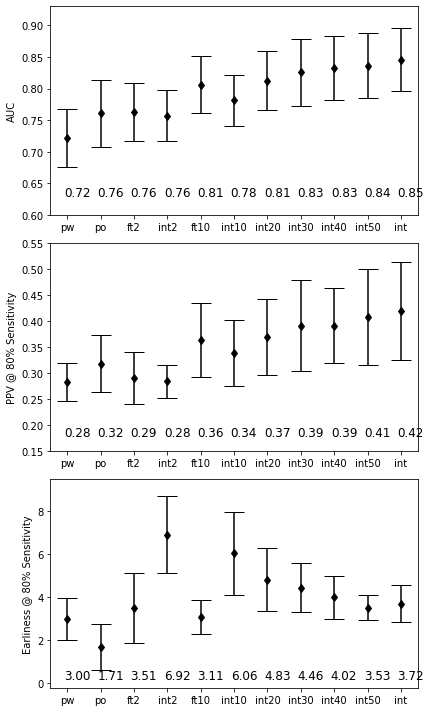

In [132]:
#plt.figure(figsize=(10,12))
plt.figure(figsize=(6,10))
ax1 = plt.subplot(311)
n_steps = 11 # 8
x_pos = np.arange(n_steps) #7
#aucs = [auc_pw_mean, auc_po_mean, auc_ft2_mean, auc_base2_mean, auc_ft10_mean, auc_base10_mean, auc_int_mean]
#stds = [auc_pw_std, auc_po_std, auc_ft2_std, auc_base2_std, auc_ft10_std, auc_base10_std, auc_int_std]
#names = ['pair-wise', 'pooled', 'ft-2%', 'int-2%', 'ft-10%', 'ft-10%-pooled', 'int-10%', 'internal']
#names = ['pair-wise', 'pooled', 'ft-2%', 'ft-10%', 'internal']
names = keys
ax1.errorbar(x_pos, aucs_m, yerr=aucs_s, ecolor='black', capsize=10, fmt='d', color='black')
###sns.stripplot(x="task", y="auc_mean", data=df_tot2, jitter=0.1, ax=ax1,alpha=0.5)

ax1.set_ylim(0.60,0.93)

ax1.set_xticks(x_pos)
ax1.set_xticklabels(names)
#ax[0].tight_layout()
ax1.set_ylabel(f'AUC')

ax2 = plt.subplot(312, sharex= ax1)

#plt.plot((2,3), (auc_ft2_mean, auc_base2_mean), '--', color='black')
#plt.plot((4,5), (auc_ft10_mean, auc_base10_mean), '--', color='black')
#plt.hlines(auc_int_mean, 0,6, color='black', linestyle='dotted')
###sns.stripplot(x="task", y="precision_mean", data=df_tot2, jitter=0.1, ax=ax2, alpha=0.5)
ax2.errorbar(x_pos, precision_m, yerr=precision_s, ecolor='black', capsize=10, fmt='d', color='black')
ax2.set_ylabel(f'PPV @ 80% Sensitivity')
ax2.set_ylim(0.15,0.55)

#ax[1].set_xticklabels(names)
#ax[1].tight_layout()

ax3 = plt.subplot(313, sharex= ax1)
###sns.stripplot(x="task", y="earliness_mean", data=df_tot2, jitter=0.1, ax=ax3, alpha=0.5)
ax3.errorbar(x_pos, earliness_m, yerr=earliness_s, ecolor='black', capsize=10, fmt='d', color='black')
ax3.set_ylabel(f'Earliness @ 80% Sensitivity')
#ax[2].set_xticklabels(names)
ax3.set_ylim(-0.2,9.5)


plt.tight_layout()
x1 = np.arange(n_steps)
y1 = np.array([0.13] * n_steps)
for i,j, n in zip(x1,y1, aucs_m):
    ax1.annotate(f'{n:.2f}',xy=(i-0.1,j+0.5), size=12)
y2 = np.array([0.18] * n_steps)

for i,j, n in zip(x1,y2, precision_m):
    ax2.annotate(f'{n:.2f}',xy=(i-0.1,j), size=12)

y3 = np.array([0.2] * n_steps)
for i,j, n in zip(x1,y3, earliness_m):
    ax3.annotate(f'{n:.2f}',xy=(i-0.1,j), size=12)

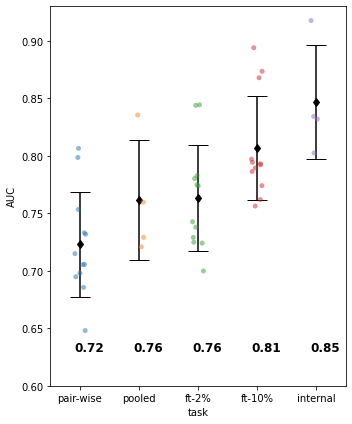

In [128]:
#plt.figure(figsize=(10,12))
plt.figure(figsize=(5,6))
ax1 = plt.subplot(111)
n_steps = 5 # 8
x_pos = np.arange(n_steps) #7
#aucs = [auc_pw_mean, auc_po_mean, auc_ft2_mean, auc_base2_mean, auc_ft10_mean, auc_base10_mean, auc_int_mean]
#stds = [auc_pw_std, auc_po_std, auc_ft2_std, auc_base2_std, auc_ft10_std, auc_base10_std, auc_int_std]
#names = ['pair-wise', 'pooled', 'ft-2%', 'int-2%', 'ft-10%', 'ft-10%-pooled', 'int-10%', 'internal']
names = ['pair-wise', 'pooled', 'ft-2%', 'ft-10%', 'internal']
ax1.errorbar(x_pos, aucs_m, yerr=aucs_s, ecolor='black', capsize=10, fmt='d', color='black')
sns.stripplot(x="task", y="auc_mean", data=df_tot2, jitter=0.1, ax=ax1,alpha=0.5)

ax1.set_ylim(0.6,0.93)

ax1.set_xticks(x_pos)
ax1.set_xticklabels(names)
#ax[0].tight_layout()
ax1.set_ylabel(f'AUC')

# ax2 = plt.subplot(312, sharex= ax1)

# #plt.plot((2,3), (auc_ft2_mean, auc_base2_mean), '--', color='black')
# #plt.plot((4,5), (auc_ft10_mean, auc_base10_mean), '--', color='black')
# #plt.hlines(auc_int_mean, 0,6, color='black', linestyle='dotted')
# sns.stripplot(x="task", y="precision_mean", data=df_tot2, jitter=0.1, ax=ax2, alpha=0.5)
# ax2.errorbar(x_pos, precision_m, yerr=precision_s, ecolor='black', capsize=10, fmt='d', color='black')
# ax2.set_ylabel(f'PPV @ 80% Sensitivity')
# ax2.set_ylim(0.15,0.55)

# #ax[1].set_xticklabels(names)
# #ax[1].tight_layout()

# ax3 = plt.subplot(313, sharex= ax1)
# sns.stripplot(x="task", y="earliness_mean", data=df_tot2, jitter=0.1, ax=ax3, alpha=0.5)
# ax3.errorbar(x_pos, earliness_m, yerr=earliness_s, ecolor='black', capsize=10, fmt='d', color='black')
# ax3.set_ylabel(f'Earliness @ 80% Sensitivity')
# #ax[2].set_xticklabels(names)
# ax3.set_ylim(-0.2,6.5)


plt.tight_layout()
x1 = np.arange(n_steps)
y1 = np.array([0.13] * n_steps)
for i,j, n in zip(x1,y1, aucs_m):
    ax1.annotate(r'{:.2f}'.format(n),xy=(i-0.1,j+0.5), size=12, weight='bold')
# y2 = np.array([0.18] * n_steps)

# for i,j, n in zip(x1,y2, precision_m):
#     ax2.annotate(f'{n:.2f}',xy=(i-0.1,j), size=12)

# y3 = np.array([0.2] * n_steps)
# for i,j, n in zip(x1,y3, earliness_m):
#     ax3.annotate(f'{n:.2f}',xy=(i-0.1,j), size=12)

In [ ]:
keys_sorted = ['ft10', 'int10', 'int']
aucs_m = [auc_means[k] for k in keys_sorted]
aucs_s = [auc_stds[k] for k in keys_sorted]
earliness_m = [earliness_means[k] for k in keys_sorted]
earliness_s = [earliness_stds[k] for k in keys_sorted]
precision_m = [precision_means[k] for k in keys_sorted]
precision_s = [precision_stds[k] for k in keys_sorted]

df_tot3 = pd.concat([df_ft10, df_base10, df_int])

plt.figure(figsize=(5,10))
ax1 = plt.subplot(311)
n_steps = 3
x_pos = np.arange(n_steps) #7
#aucs = [auc_pw_mean, auc_po_mean, auc_ft2_mean, auc_base2_mean, auc_ft10_mean, auc_base10_mean, auc_int_mean]
#stds = [auc_pw_std, auc_po_std, auc_ft2_std, auc_base2_std, auc_ft10_std, auc_base10_std, auc_int_std]
names = ['ft-10%', 'int-10%', 'internal-100%']
ax1.errorbar(x_pos, aucs_m, yerr=aucs_s, ecolor='black', capsize=10, fmt='d', color='black')
sns.stripplot(x="task", y="auc_mean", data=df_tot3, jitter=0.1, ax=ax1,alpha=0.5)

ax1.set_ylim(0.70,0.93)

ax1.set_xticks(x_pos)
ax1.set_xticklabels(names)
#ax[0].tight_layout()
ax1.set_ylabel(f'AUROC')

# ax2 = plt.subplot(312, sharex= ax1)

# #plt.plot((2,3), (auc_ft2_mean, auc_base2_mean), '--', color='black')
# #plt.plot((4,5), (auc_ft10_mean, auc_base10_mean), '--', color='black')
# #plt.hlines(auc_int_mean, 0,6, color='black', linestyle='dotted')
# sns.stripplot(x="task", y="precision_mean", data=df_tot2, jitter=0.1, ax=ax2, alpha=0.5)
# ax2.errorbar(x_pos, precision_m, yerr=precision_s, ecolor='black', capsize=10, fmt='d', color='black')
# ax2.set_ylabel(f'PPV @ 80% Sensitivity')
# ax2.set_ylim(0.15,0.55)

# #ax[1].set_xticklabels(names)
# #ax[1].tight_layout()

# ax3 = plt.subplot(313, sharex= ax1)
# sns.stripplot(x="task", y="earliness_mean", data=df_tot2, jitter=0.1, ax=ax3, alpha=0.5)
# ax3.errorbar(x_pos, earliness_m, yerr=earliness_s, ecolor='black', capsize=10, fmt='d', color='black')
# ax3.set_ylabel(f'Earliness @ 80% Sensitivity')
# #ax[2].set_xticklabels(names)
# ax3.set_ylim(-0.2,6.5)


plt.tight_layout()
x1 = np.arange(n_steps)
y1 = np.array([0.13] * n_steps)
for i,j, n in zip(x1,y1, aucs_m):
    ax1.annotate(f'{n:.2f}',xy=(i-0.1,j+0.58), size=12)
y2 = np.array([0.18] * n_steps)

# for i,j, n in zip(x1,y2, precision_m):
#     ax2.annotate(f'{n:.2f}',xy=(i-0.1,j), size=12)

# y3 = np.array([0.2] * n_steps)
# for i,j, n in zip(x1,y3, earliness_m):
#     ax3.annotate(f'{n:.2f}',xy=(i-0.1,j), size=12)
    
plt.plot((0,1), (auc_ft10_mean, auc_base10_mean), '--', color='black')
#plt.plot((4,5), (auc_ft10_mean, auc_base10_mean), '--', color='black')
#plt.hlines(auc_int_mean, 0,2, color='black', linestyle='dotted')